In [336]:
import pandas as pd

df = pd.read_csv('data/dataset.c128210b03b5e528dbf3.csv')
df.head()

,observation_uuid,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,day_of_week,hour,minute,fee
0,0d742256-0b36-f3cd-0acf-eba4441030ae,48.8406,2.3220,75014,48.8262,2.3192,75014,2,5,Saturday,13,44,1.69
1,743c7e9d-2fde-b035-2452-bc39dbf2eed1,48.8472,2.3527,75005,48.8337,2.3880,75012,9,3,Tuesday,14,14,1.59
2,43893bc5-449c-56ef-3857-ebe679ffa869,48.9015,2.3704,75019,48.8814,2.3484,75009,1,9,Sunday,14,39,2.19
3,284884a2-55e5-c1d9-b036-4ad9ee5be9b9,48.8504,2.2902,75015,48.8716,2.2811,75016,6,2,Thursday,12,46,1.79
4,a0ce5b5f-ca56-3921-f942-2f1efed97f9e,48.8583,2.3894,75011,48.8623,2.3426,75001,2,6,Friday,13,38,2.09


(array([939., 952., 975., 961., 973.]),
 array([10957.5       , 10957.52486111, 10957.54972222, 10957.57458333,
        10957.59944444, 10957.62430556]),
 <BarContainer object of 5 artists>)

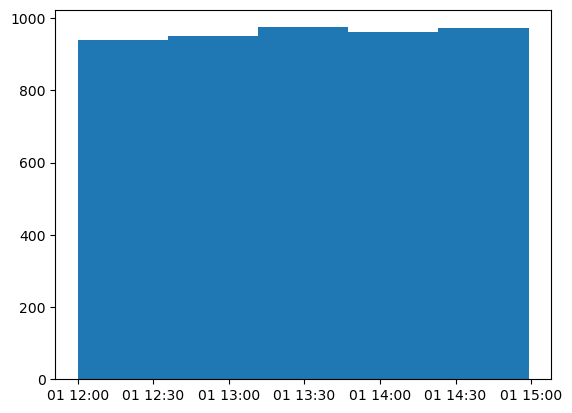

In [337]:
import datetime
import matplotlib.pyplot as plt

df['time_obj'] = df.apply(lambda x: datetime.datetime(2000,1,1,x['hour'], x['minute']), axis=1)

plt.hist(df['time_obj'], bins=5)

4800


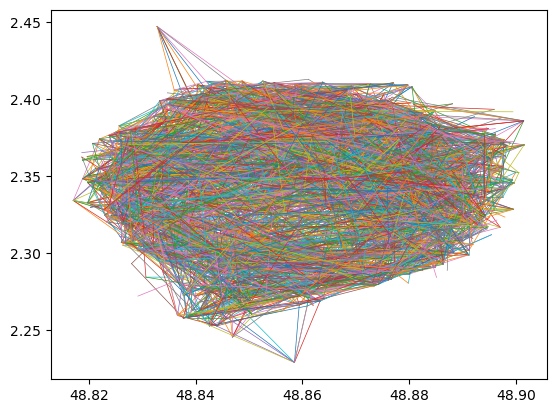

In [77]:
import matplotlib.pyplot as plt

#plt.scatter(x=df['start_lat'], y=df['start_lon'], color='red', s=5)
#plt.scatter(x=df['end_lat'], y=df['end_lon'], color='blue', s=5)

plt.plot()
print(df.shape[0])

for i in range(df.shape[0]):
    plt.plot([df['start_lat'].to_numpy()[i], df['end_lat'].to_numpy()[i]],
             [df['start_lon'].to_numpy()[i], df['end_lon'].to_numpy()[i]],
            linewidth=0.5)

plt.show()

In [78]:
df.describe()

,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,hour,minute,fee
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,48.859372,2.343179,75013.040000,48.859508,2.343550,75012.593750,4.462917,4.387917,12.980833,30.540625,1.936438
std,0.020661,0.038938,6.595513,0.019633,0.036029,7.258192,2.867186,2.860430,0.820684,16.728867,0.695627
min,48.817100,2.229100,75001.000000,48.817100,2.229100,75001.000000,0.000000,0.000000,12.000000,0.000000,0.590000
25%,48.843475,2.317050,75010.000000,48.844200,2.316550,75009.000000,2.000000,2.000000,12.000000,17.000000,1.390000
50%,48.859400,2.347000,75014.000000,48.860000,2.346800,75013.000000,5.000000,4.000000,13.000000,31.000000,1.890000
75%,48.876375,2.373525,75017.000000,48.875300,2.372200,75017.000000,7.000000,7.000000,14.000000,45.000000,2.490000
max,48.901500,2.447300,75116.000000,48.901500,2.447300,75116.000000,9.000000,9.000000,14.000000,59.000000,4.690000


<AxesSubplot: >

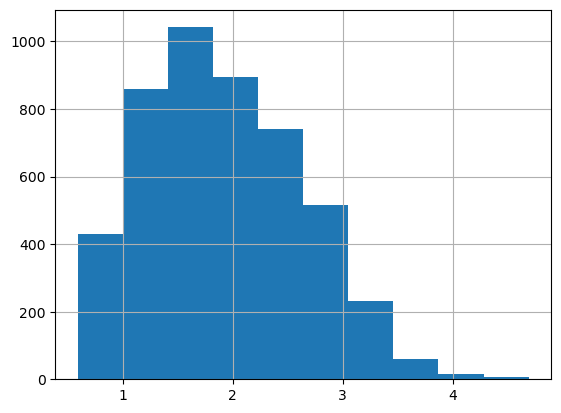

In [79]:
df['fee'].hist()

In [338]:
unique_fee = df.groupby('fee')['observation_uuid'].count()
print(len(unique_fee))
unique_fee.sort_values(ascending=False)

41


fee
1.59    276
1.39    271
1.79    266
1.49    257
1.89    256
1.69    243
1.29    228
2.09    222
1.99    217
1.19    207
2.49    206
2.29    201
2.19    200
2.69    178
2.39    167
2.59    167
1.09    153
0.99    138
2.79    124
2.89    118
0.89    114
2.99     95
3.09     77
0.79     70
0.59     66
3.19     65
3.29     51
0.69     42
3.39     40
3.59     20
3.69     17
3.49     16
3.89      8
3.79      7
4.09      5
3.99      4
4.39      4
4.29      1
4.49      1
4.59      1
4.69      1
Name: observation_uuid, dtype: int64

<AxesSubplot: xlabel='fee'>

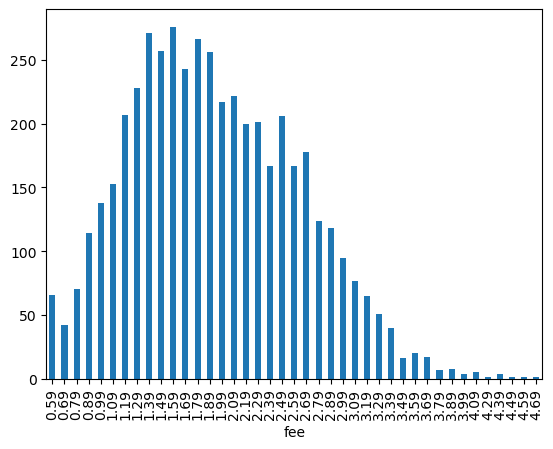

In [289]:
unique_fee.plot.bar()

In [339]:
import geopy.distance

df['distance'] = df.apply(lambda x :
    geopy.distance.geodesic((x['start_lat'], x['start_lon']), (x['end_lat'], x['end_lon'])).km, axis=1)

df.head()

,observation_uuid,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,day_of_week,hour,minute,fee,time_obj,distance
0,0d742256-0b36-f3cd-0acf-eba4441030ae,48.8406,2.3220,75014,48.8262,2.3192,75014,2,5,Saturday,13,44,1.69,2000-01-01 13:44:00,1.614514
1,743c7e9d-2fde-b035-2452-bc39dbf2eed1,48.8472,2.3527,75005,48.8337,2.3880,75012,9,3,Tuesday,14,14,1.59,2000-01-01 14:14:00,2.994697
2,43893bc5-449c-56ef-3857-ebe679ffa869,48.9015,2.3704,75019,48.8814,2.3484,75009,1,9,Sunday,14,39,2.19,2000-01-01 14:39:00,2.756647
3,284884a2-55e5-c1d9-b036-4ad9ee5be9b9,48.8504,2.2902,75015,48.8716,2.2811,75016,6,2,Thursday,12,46,1.79,2000-01-01 12:46:00,2.450320
4,a0ce5b5f-ca56-3921-f942-2f1efed97f9e,48.8583,2.3894,75011,48.8623,2.3426,75001,2,6,Friday,13,38,2.09,2000-01-01 13:38:00,3.462698


(array([170., 342., 498., 587., 725., 769., 737., 541., 317., 114.]),
 array([0.10413184, 0.58556701, 1.06700218, 1.54843735, 2.02987252,
        2.51130769, 2.99274285, 3.47417802, 3.95561319, 4.43704836,
        4.91848353]),
 <BarContainer object of 10 artists>)

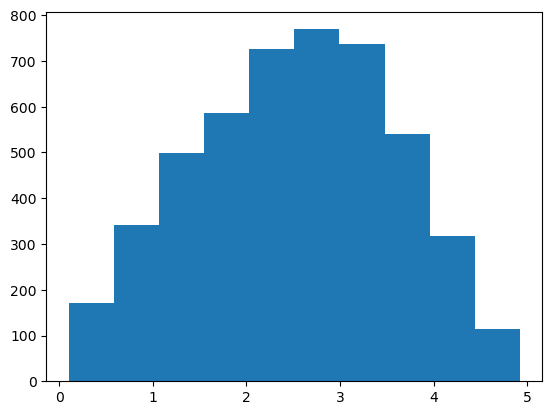

In [315]:
plt.hist(df['distance'])

<AxesSubplot: >

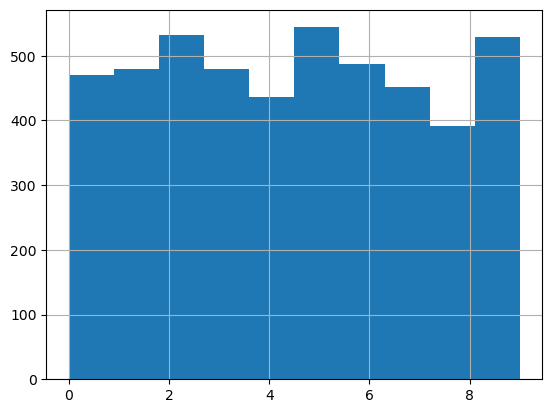

In [92]:
df['rain'].hist()

<AxesSubplot: >

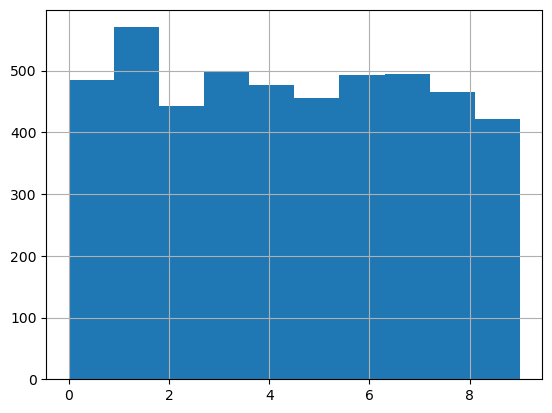

In [93]:
df['heat'].hist()

(array([739., 660., 660., 708., 670., 695., 668.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

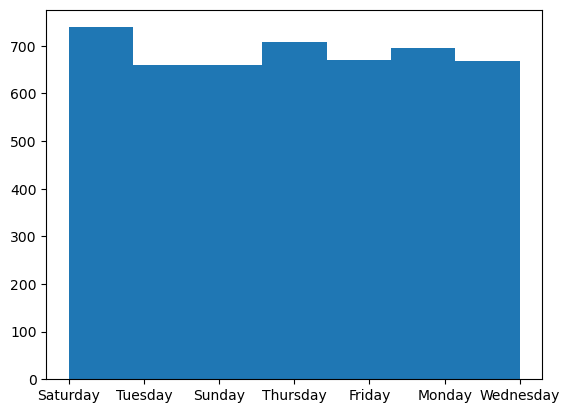

In [94]:
plt.hist(df['day_of_week'], bins=7)

In [340]:
def is_weekend(value):
    if value in ['Saturday', 'Sunday']:
        return 1
    else:
        return 0
        

df['is_weekend'] = df['day_of_week'].apply(is_weekend)
df

,observation_uuid,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,day_of_week,hour,minute,fee,time_obj,distance,is_weekend
0,0d742256-0b36-f3cd-0acf-eba4441030ae,48.8406,2.3220,75014,48.8262,2.3192,75014,2,5,Saturday,13,44,1.69,2000-01-01 13:44:00,1.614514,1
1,743c7e9d-2fde-b035-2452-bc39dbf2eed1,48.8472,2.3527,75005,48.8337,2.3880,75012,9,3,Tuesday,14,14,1.59,2000-01-01 14:14:00,2.994697,0
2,43893bc5-449c-56ef-3857-ebe679ffa869,48.9015,2.3704,75019,48.8814,2.3484,75009,1,9,Sunday,14,39,2.19,2000-01-01 14:39:00,2.756647,1
3,284884a2-55e5-c1d9-b036-4ad9ee5be9b9,48.8504,2.2902,75015,48.8716,2.2811,75016,6,2,Thursday,12,46,1.79,2000-01-01 12:46:00,2.450320,0
4,a0ce5b5f-ca56-3921-f942-2f1efed97f9e,48.8583,2.3894,75011,48.8623,2.3426,75001,2,6,Friday,13,38,2.09,2000-01-01 13:38:00,3.462698,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,a51e940c-d74a-4e60-a432-e35d461e3ae9,48.8333,2.3991,75012,48.8344,2.3875,75012,7,0,Monday,14,9,1.29,2000-01-01 14:09:00,0.860353,0
4796,53e82886-9411-723a-50b4-17eb7111f1d1,48.8359,2.3381,75014,48.8592,2.3036,75007,0,2,Tuesday,13,51,2.59,2000-01-01 13:51:00,3.622918,0
4797,648a1e4b-fccb-1162-5311-cb54a0665299,48.8469,2.2456,75016,48.8680,2.2988,75016,9,2,Thursday,12,23,2.49,2000-01-01 12:23:00,4.554761,0
4798,51d4e883-bac0-7cab-b734-5e6adf01d2ae,48.8409,2.3497,75005,48.8604,2.3856,75011,1,0,Thursday,12,20,2.09,2000-01-01 12:20:00,3.412367,0


In [341]:
df['fee_distance_factor'] = df['fee'] / df['distance']


/opt/mamba/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:701: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(self.xlim)


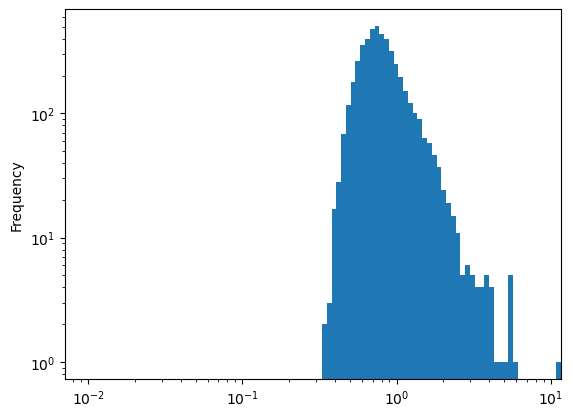

In [342]:

max_value=max(df['fee_distance_factor'])
some_column_hist = df['fee_distance_factor'].plot(bins=np.logspace(-2, np.log10(max_value), 100), kind='hist', loglog=True, xlim=(0,max_value))


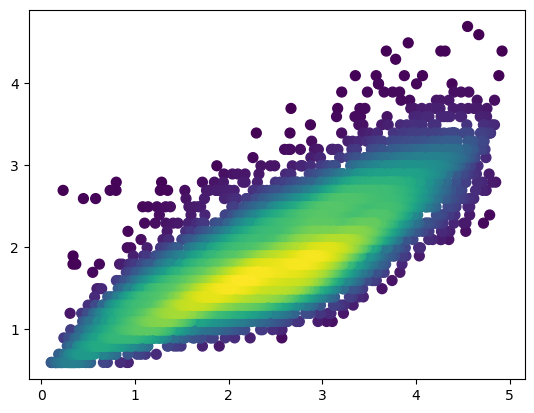

In [294]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = df['distance']
y = df['fee']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
plt.show()

<AxesSubplot: xlabel='distance', ylabel='fee'>

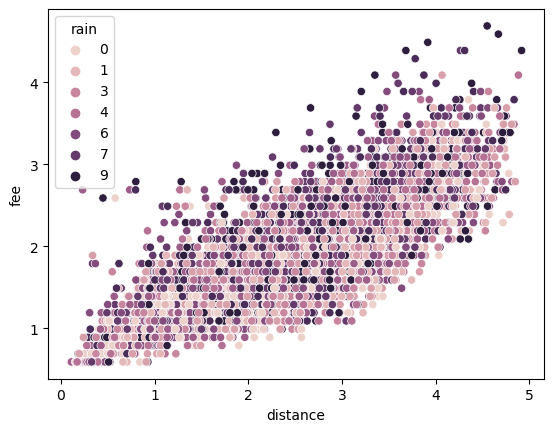

In [97]:
import seaborn as sns
sns.scatterplot(data=df, x='distance', y='fee', hue='rain')

<AxesSubplot: xlabel='distance', ylabel='fee'>

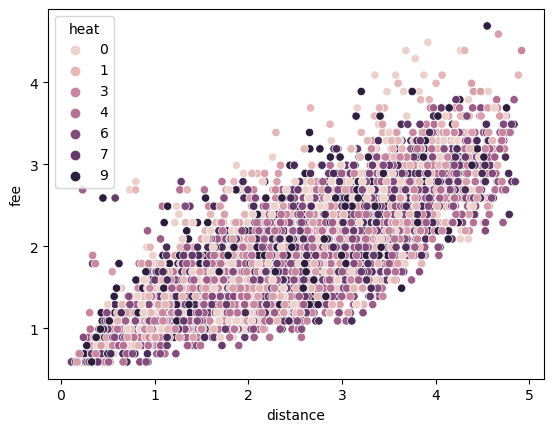

In [150]:
import seaborn as sns
sns.scatterplot(data=df, x='distance', y='fee', hue='heat')

In [343]:
df_group = df.groupby(['start_lat', 'start_lon'], as_index=False).agg({
    'observation_uuid': 'count', 
    'fee': lambda x: list(x),
    'distance': lambda x: list(x),
    'fee_distance_factor': lambda x: list(x),
    'observation_uuid': lambda x: list(x)})
df_group

,start_lat,start_lon,observation_uuid,fee,distance,fee_distance_factor
0,48.8171,2.3343,"[5ecc2838-1e33-ae64-8b5f-f9ef228f3e0c, bad0e4d...","[0.99, 1.29, 0.99, 0.89, 0.89, 0.89, 1.29, 0.69]","[2.360975721752903, 2.980324962657349, 1.52640...","[0.4193181619271273, 0.43283870590064666, 0.64..."
1,48.8189,2.3484,"[e51c0cdb-8247-34df-dd1f-8e30731c877a, 4598244...","[0.89, 2.39, 1.19, 1.69, 2.19, 2.39, 2.39, 0.89]","[0.5091837102060907, 3.798273029949807, 0.9069...","[1.7478956654755806, 0.6292333334530149, 1.312..."
2,48.8198,2.3329,"[10f143e2-1abc-918e-c785-b14453158ee1, c988e41...","[1.29, 1.39, 1.59, 1.69, 0.69, 1.79, 1.19, 1.79]","[2.295554091735335, 2.660372673673482, 2.77041...","[0.5619558278519233, 0.5224831895753415, 0.573..."
3,48.8198,2.3459,"[571aa4f6-40a2-1015-0a40-a3799a1ab357, 566ff3e...","[1.69, 2.29, 1.69, 1.79, 0.59, 1.79, 2.19, 1.59]","[2.1111934603551314, 3.807887930796776, 2.0925...","[0.8004950904479019, 0.6013832448899914, 0.807..."
4,48.8198,2.3503,"[00d2870b-4b5c-31ed-72bb-ccfc34ff496a, d52583c...","[2.79, 3.29, 3.09, 2.19, 2.39, 2.29, 2.99, 2.29]","[4.655063863235946, 4.727481162604448, 3.96205...","[0.5993473090744118, 0.6959308534161317, 0.779..."
...,...,...,...,...,...,...
595,48.8993,2.3477,"[df3d3f96-e66c-50f1-9e6a-df9e9a2cb0d3, 6398517...","[1.09, 1.49, 2.19, 1.39, 0.89, 1.89, 1.69, 1.69]","[1.3468197727239288, 3.009778406633135, 3.4703...","[0.8093139275758379, 0.4950530566357464, 0.631..."
596,48.8995,2.3286,"[4d18c103-a100-ed14-fa92-cd28c4c536fb, c149fa8...","[1.49, 1.69, 1.69, 1.89, 1.29, 1.39, 0.69, 1.29]","[1.872945157930828, 2.570355793718069, 2.67660...","[0.7955385098654495, 0.6574965240727948, 0.631..."
597,48.8996,2.3456,"[9cec5333-b416-cbed-01d5-80ec4a53ba16, 39aa80f...","[1.19, 0.99, 0.59, 0.79, 0.59, 0.59, 1.09, 0.99]","[1.981138509473942, 1.5169441154944505, 0.5013...","[0.6006647159243724, 0.6526278653827058, 1.176..."
598,48.9014,2.3860,"[81a486b6-b8b3-cc8e-ca16-9cf450f6dfc7, b60bfaf...","[1.89, 1.09, 1.39, 1.79, 2.69, 1.79, 2.59, 2.29]","[2.914355410898709, 1.002638934667061, 2.83382...","[0.6485139022275854, 1.087131131968208, 0.4905..."


In [344]:
from scipy.stats import pearsonr

df_group['corr'] = df_group.apply(lambda x: pearsonr(x['fee'], x['distance'])[0], axis=1)
df_group

/opt/mamba/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,start_lat,start_lon,observation_uuid,fee,distance,fee_distance_factor,corr
0,48.8171,2.3343,"[5ecc2838-1e33-ae64-8b5f-f9ef228f3e0c, bad0e4d...","[0.99, 1.29, 0.99, 0.89, 0.89, 0.89, 1.29, 0.69]","[2.360975721752903, 2.980324962657349, 1.52640...","[0.4193181619271273, 0.43283870590064666, 0.64...",0.919712
1,48.8189,2.3484,"[e51c0cdb-8247-34df-dd1f-8e30731c877a, 4598244...","[0.89, 2.39, 1.19, 1.69, 2.19, 2.39, 2.39, 0.89]","[0.5091837102060907, 3.798273029949807, 0.9069...","[1.7478956654755806, 0.6292333334530149, 1.312...",0.996134
2,48.8198,2.3329,"[10f143e2-1abc-918e-c785-b14453158ee1, c988e41...","[1.29, 1.39, 1.59, 1.69, 0.69, 1.79, 1.19, 1.79]","[2.295554091735335, 2.660372673673482, 2.77041...","[0.5619558278519233, 0.5224831895753415, 0.573...",0.909887
3,48.8198,2.3459,"[571aa4f6-40a2-1015-0a40-a3799a1ab357, 566ff3e...","[1.69, 2.29, 1.69, 1.79, 0.59, 1.79, 2.19, 1.59]","[2.1111934603551314, 3.807887930796776, 2.0925...","[0.8004950904479019, 0.6013832448899914, 0.807...",0.977525
4,48.8198,2.3503,"[00d2870b-4b5c-31ed-72bb-ccfc34ff496a, d52583c...","[2.79, 3.29, 3.09, 2.19, 2.39, 2.29, 2.99, 2.29]","[4.655063863235946, 4.727481162604448, 3.96205...","[0.5993473090744118, 0.6959308534161317, 0.779...",0.908900
...,...,...,...,...,...,...,...
595,48.8993,2.3477,"[df3d3f96-e66c-50f1-9e6a-df9e9a2cb0d3, 6398517...","[1.09, 1.49, 2.19, 1.39, 0.89, 1.89, 1.69, 1.69]","[1.3468197727239288, 3.009778406633135, 3.4703...","[0.8093139275758379, 0.4950530566357464, 0.631...",0.899930
596,48.8995,2.3286,"[4d18c103-a100-ed14-fa92-cd28c4c536fb, c149fa8...","[1.49, 1.69, 1.69, 1.89, 1.29, 1.39, 0.69, 1.29]","[1.872945157930828, 2.570355793718069, 2.67660...","[0.7955385098654495, 0.6574965240727948, 0.631...",0.973423
597,48.8996,2.3456,"[9cec5333-b416-cbed-01d5-80ec4a53ba16, 39aa80f...","[1.19, 0.99, 0.59, 0.79, 0.59, 0.59, 1.09, 0.99]","[1.981138509473942, 1.5169441154944505, 0.5013...","[0.6006647159243724, 0.6526278653827058, 1.176...",0.954581
598,48.9014,2.3860,"[81a486b6-b8b3-cc8e-ca16-9cf450f6dfc7, b60bfaf...","[1.89, 1.09, 1.39, 1.79, 2.69, 1.79, 2.59, 2.29]","[2.914355410898709, 1.002638934667061, 2.83382...","[0.6485139022275854, 1.087131131968208, 0.4905...",0.777178


<AxesSubplot: >

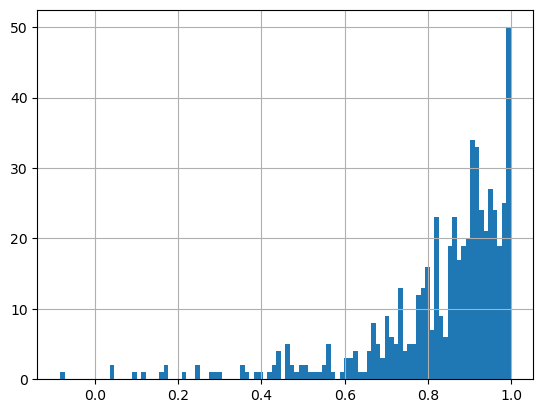

In [321]:
df_group['corr'].hist(bins=100)

0       0.581006
1       0.748603
2       0.888268
3       0.256983
4       0.547486
          ...   
4795    0.720670
4796    0.620112
4797    0.128492
4798    0.111732
4799    0.865922
Name: time_norm, Length: 4800, dtype: float64


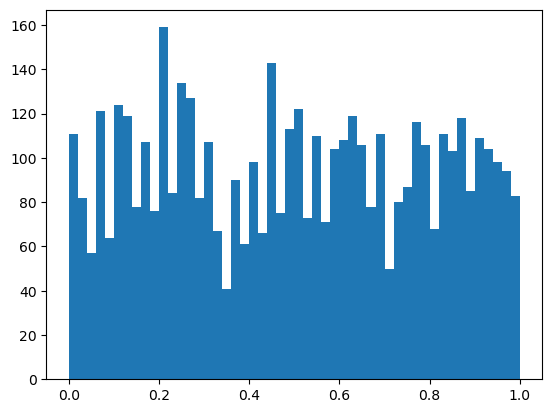

In [345]:

max_a = df['time_obj'].max()
min_a = df['time_obj'].min()
min_norm = 0
max_norm =1
df['time_norm'] = (df['time_obj']- min_a) *(max_norm - min_norm) / (max_a-min_a) + min_norm
df['time_norm']

plt.hist(df['time_norm'], bins=50)
print(df['time_norm'])

In [346]:
list_manual = df_group[df_group['corr'] < 0.6]['observation_uuid']
print(len(list_manual))
print((list_manual))
id_manual = []
for row in list_manual.tolist():
    for item in row:
        id_manual.append(item)
df['algorithm'] = df.apply(lambda x: 0 if x['observation_uuid'] in id_manual else None, axis=1)
df_manual = df[df['algorithm']==0]

df = df[df['algorithm']!=0]

50
14     [801fa463-0512-3151-bc1e-8145dc309b69, 4e60ae0...
25     [db7c2739-4a2b-233a-dba6-30a8b5a2466e, ff2abd8...
31     [e0def1a0-742a-ca38-842a-ab1ff7e9735b, 1803b6e...
34     [d2bddb3b-649e-c503-3c73-7aead273dcbe, f65a1a2...
77     [054e5126-7953-00f7-4a13-93ab39b3c49d, b26c687...
100    [6ac85f42-a9c0-fdec-6c25-aad69dcc668f, af3da6a...
131    [a5d8bbec-6e01-5bad-8856-0352adc3324b, aaa0f9b...
166    [636c7dd5-2a23-6a88-f66a-e1d6e484a48e, 966d66e...
173    [32f33d7a-b411-56a6-3e52-4f70dd618829, 68bc5a9...
176    [40473f98-b7b3-aa30-e3d9-36bf0a1ee938, cb4ff2e...
207    [5e17ca5f-e53d-1459-7228-ef1113638d54, 09b3f5f...
237    [24d8b7fe-d00c-f571-ff3a-49929d92c16e, 0a3db26...
239    [1a39201f-70ec-a293-07c8-f8514e1939b8, b92f228...
252    [b51e3a7b-acdf-3038-467c-cafabbe74e1b, 89de7a2...
258    [13896d5f-e051-d913-557e-71ee8d05f9d4, 058c4c3...
276    [adc8b698-c723-0929-95c0-8df88032a324, 4268e2b...
284    [4dadbfb0-08b4-f16f-30a4-07e9923e267e, b4e0bc1...
286    [2d58cc88-a9ac-3915-b

In [347]:
df_manual

,observation_uuid,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,day_of_week,hour,minute,fee,time_obj,distance,is_weekend,fee_distance_factor,time_norm,algorithm
10,f9d7d79d-fd0b-fd3b-a7d8-baef3a0aff49,48.8599,2.2737,75016,48.8699,2.2996,75008,2,3,Tuesday,14,44,2.49,2000-01-01 14:44:00,2.201756,0,1.130916,0.916201,0.0
27,636c7dd5-2a23-6a88-f66a-e1d6e484a48e,48.8451,2.2868,75015,48.8491,2.2637,75016,7,5,Saturday,12,53,1.09,2000-01-01 12:53:00,1.752819,1,0.621855,0.296089,0.0
34,b0464634-93a7-468c-10c1-5f57fed68dc1,48.8644,2.3382,75001,48.8818,2.3467,75009,9,1,Saturday,12,16,2.49,2000-01-01 12:16:00,2.032991,1,1.224797,0.089385,0.0
41,3335219c-0922-4fa0-365d-3eed327bb556,48.8694,2.2844,75016,48.8762,2.2963,75017,7,0,Tuesday,14,3,0.89,2000-01-01 14:03:00,1.154951,0,0.770596,0.687151,0.0
42,17bab888-7923-72e2-31a2-baf81c660eb4,48.8741,2.2814,75016,48.8912,2.3021,75017,3,1,Monday,13,12,2.19,2000-01-01 13:12:00,2.433358,0,0.899991,0.402235,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,6bc1e83d-96c9-b54e-0224-6f10ce65b211,48.8648,2.3472,75002,48.8856,2.3596,75018,7,0,Wednesday,12,45,1.29,2000-01-01 12:45:00,2.485528,0,0.519004,0.251397,0.0
4789,484fca5f-c72a-5681-bc3c-a3ca18f7c9f7,48.8672,2.3921,75020,48.8752,2.3271,75009,2,7,Sunday,12,56,2.79,2000-01-01 12:56:00,4.850701,1,0.575175,0.312849,0.0
4790,34f94c9b-275a-b60d-7b1e-aff70476d968,48.8262,2.3538,75013,48.8260,2.3784,75013,1,1,Thursday,12,53,1.49,2000-01-01 12:53:00,1.806421,0,0.824835,0.296089,0.0
4791,3faca756-c88b-a627-d7c5-a147ebd2952e,48.8911,2.2990,75017,48.8768,2.2865,75017,5,2,Tuesday,14,39,1.49,2000-01-01 14:39:00,1.835597,0,0.811725,0.888268,0.0


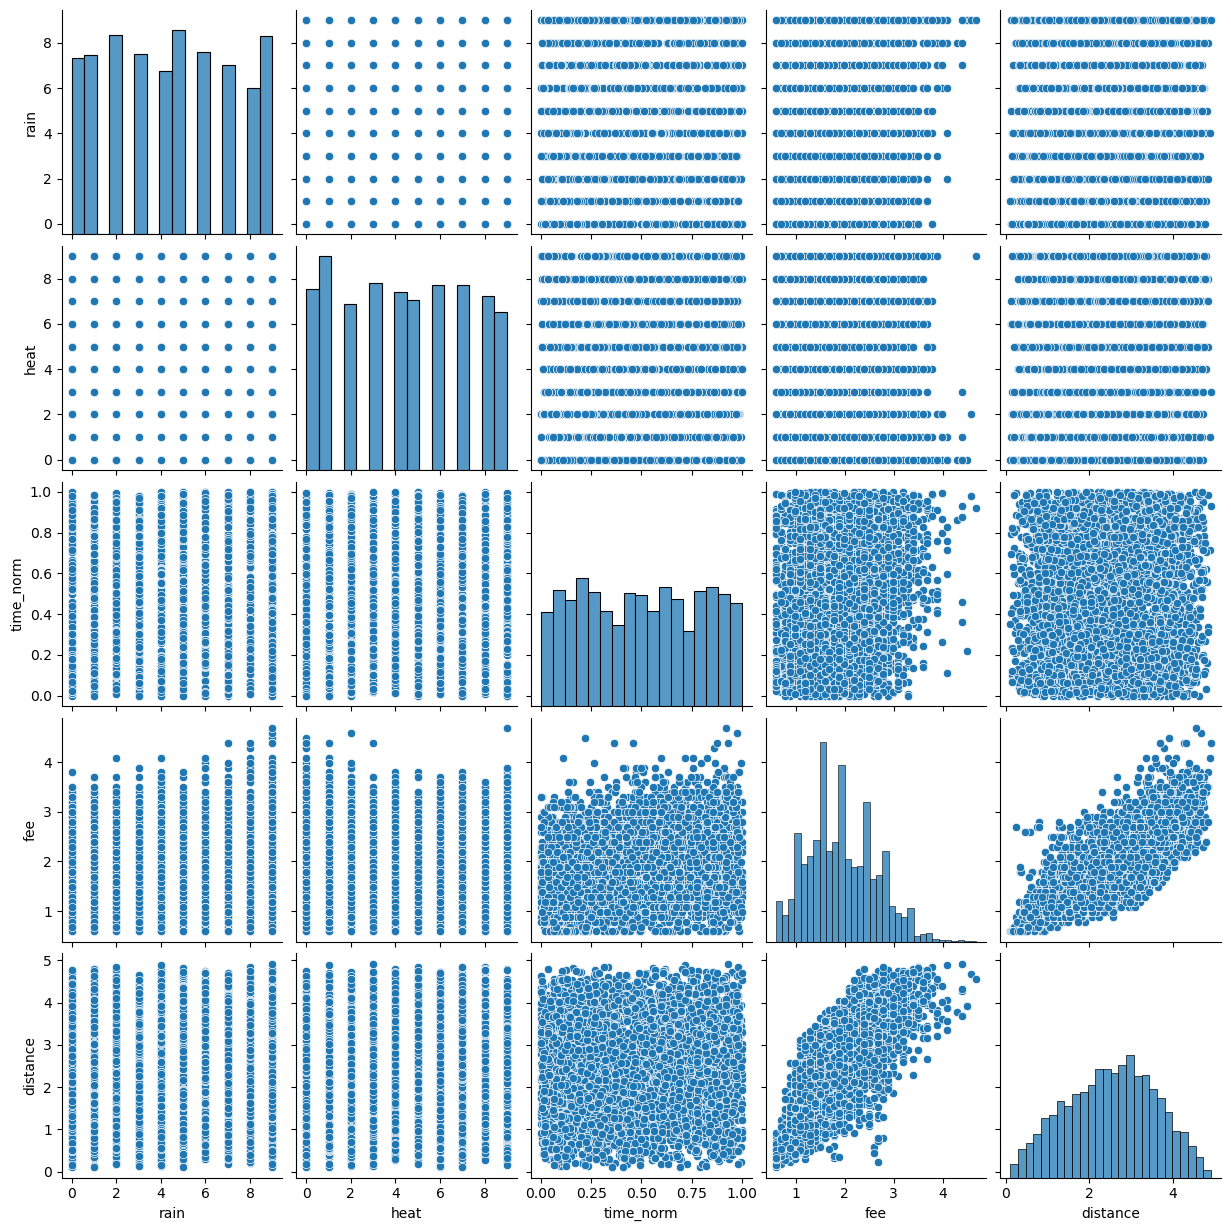

In [101]:
import seaborn as sns
sns.pairplot(df[['rain', 'heat', 'time_norm', 'fee', 'distance']])

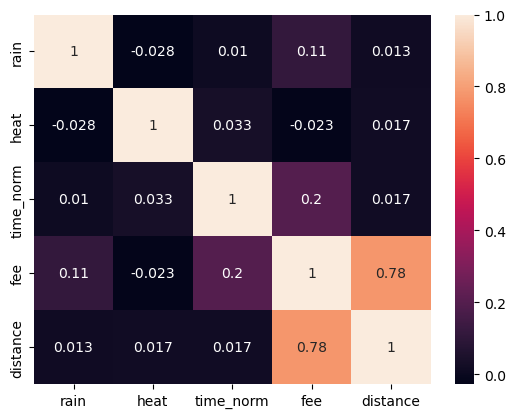

In [102]:
corr_matrix = df[['rain', 'heat', 'time_norm', 'fee', 'distance']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<AxesSubplot: xlabel='distance', ylabel='time_norm'>

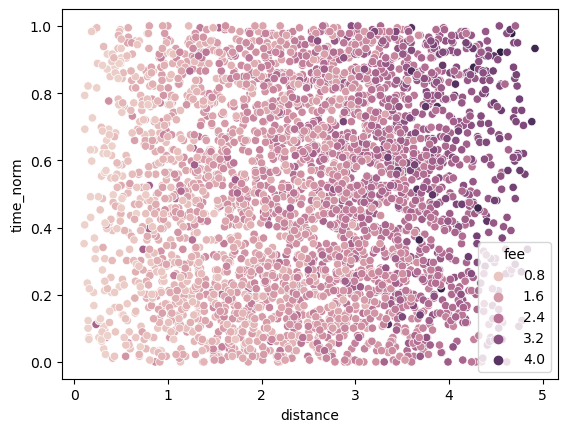

In [255]:
sns.scatterplot(data=df, x='distance', y='time_norm', hue='fee')

In [348]:
categorical_features = ['is_weekend'] #day_of_week
numeric_features = ['rain', 'heat', 'fee', 'distance', 'fee_distance_factor', 'is_weekend']

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = MinMaxScaler()

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_features),
    ('standard_scaler', numerical_preprocessor, numeric_features)],
    remainder='passthrough')

df_norm = pd.DataFrame(preprocessor.fit_transform(df[['is_weekend','rain', 'heat', 'fee', 'fee_distance_factor', 'distance', 'time_norm']]), columns=preprocessor.get_feature_names_out())
df_norm

,one-hot-encoder__is_weekend_0,one-hot-encoder__is_weekend_1,standard_scaler__rain,standard_scaler__heat,standard_scaler__fee,standard_scaler__distance,standard_scaler__fee_distance_factor,standard_scaler__is_weekend,remainder__time_norm
0,0.0,1.0,0.222222,0.555556,0.268293,0.313725,0.061882,1.0,0.581006
1,1.0,0.0,1.000000,0.333333,0.243902,0.600406,0.016004,0.0,0.748603
2,0.0,1.0,0.111111,1.000000,0.390244,0.550960,0.039441,1.0,0.888268
3,1.0,0.0,0.666667,0.222222,0.292683,0.487332,0.033755,0.0,0.256983
4,1.0,0.0,0.222222,0.666667,0.365854,0.697615,0.022465,0.0,0.547486
...,...,...,...,...,...,...,...,...,...
4395,0.0,1.0,0.666667,0.777778,0.317073,0.671955,0.019123,1.0,0.642458
4396,1.0,0.0,0.777778,0.000000,0.170732,0.157076,0.102140,0.0,0.720670
4397,1.0,0.0,0.000000,0.222222,0.487805,0.730895,0.032366,0.0,0.620112
4398,1.0,0.0,1.000000,0.222222,0.463415,0.924450,0.017404,0.0,0.128492


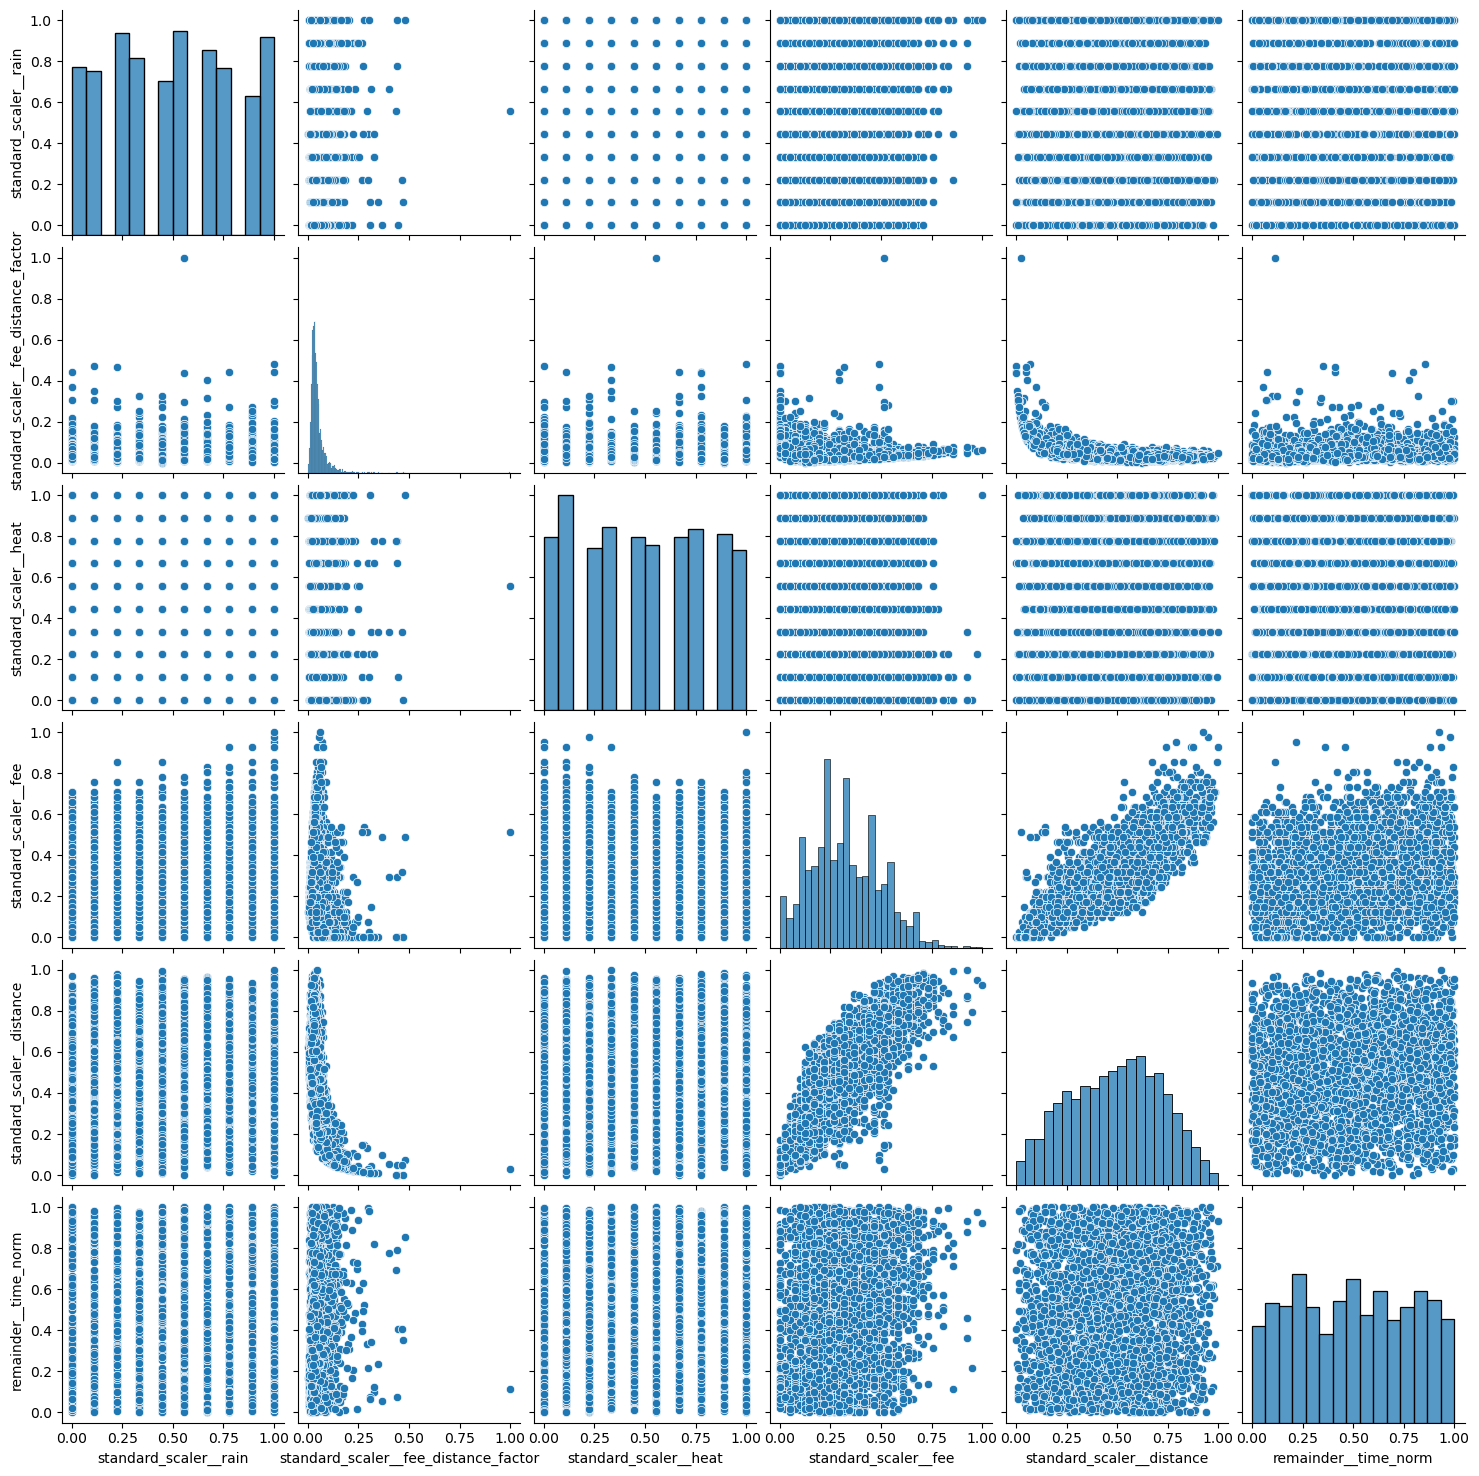

In [257]:
sns.pairplot(df_norm[['standard_scaler__rain','standard_scaler__fee_distance_factor', 'standard_scaler__heat', 'standard_scaler__fee', 'standard_scaler__distance', 'remainder__time_norm']])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0.22222222 0.55555556 0.06188214 0.58100559 1.        ]
 [1.         0.33333333 0.01600409 0.74860335 0.        ]
 [0.11111111 1.         0.0394409  0.88826816 1.        ]
 ...
 [0.         0.22222222 0.03236551 0.62011173 0.        ]
 [1.         0.22222222 0.01740425 0.12849162 0.        ]
 [0.11111111 0.44444444 0.02777221 0.86592179 1.        ]]
[4 0 4 ... 1 0 4]


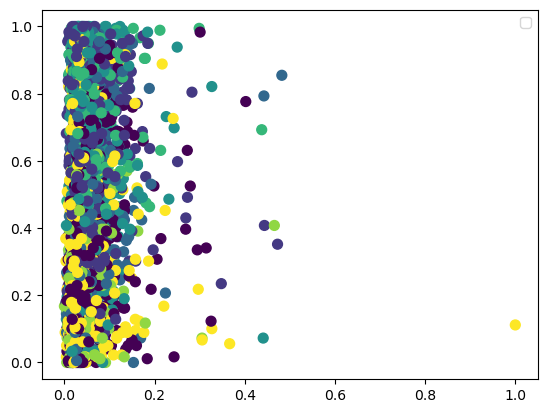

In [349]:
from sklearn.cluster import KMeans

X = df_norm[['standard_scaler__rain', 
             'standard_scaler__heat', 
             'standard_scaler__fee_distance_factor', 
             'remainder__time_norm', 
             'standard_scaler__is_weekend']].to_numpy()
print(X)

kmeans = KMeans(n_clusters=7, random_state=0, n_init="auto").fit(X)
print(kmeans.labels_)
#print(kmeans.cluster_centers_)


 
plt.scatter(X[:, 2], X[:, 3], c=kmeans.labels_, s=50, cmap='viridis')
plt.legend()

In [350]:
df['algorithm'] = kmeans.labels_ + 1

merged = pd.concat([df_manual,df])
merged['algorithm'] = merged['algorithm'].astype('int64')

header = ['observation_uuid', 'algorithm']
merged[['observation_uuid', 'algorithm']].to_csv('output.csv', columns = header, index=False)

/tmp/ipykernel_173/903831525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['algorithm'] = kmeans.labels_ + 1


In [333]:
from sklearn.cluster import DBSCAN

X = df_norm[['standard_scaler__rain', 'standard_scaler__distance', 'remainder__time_norm', 'standard_scaler__is_weekend']].to_numpy()
print(X)
clustering = DBSCAN(eps=0.15, min_samples=10).fit(X)
labels = clustering.labels_
print(labels)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

[[0.22222222 0.31372485 0.58100559 1.        ]
 [1.         0.60040595 0.74860335 0.        ]
 [0.11111111 0.55096    0.88826816 1.        ]
 ...
 [0.         0.73089515 0.62011173 0.        ]
 [1.         0.9244503  0.12849162 0.        ]
 [0.11111111 0.82080723 0.86592179 1.        ]]
[0 1 0 ... 1 1 0]
Estimated number of clusters: 3
Estimated number of noise points: 25


<AxesSubplot: xlabel='distance', ylabel='fee'>

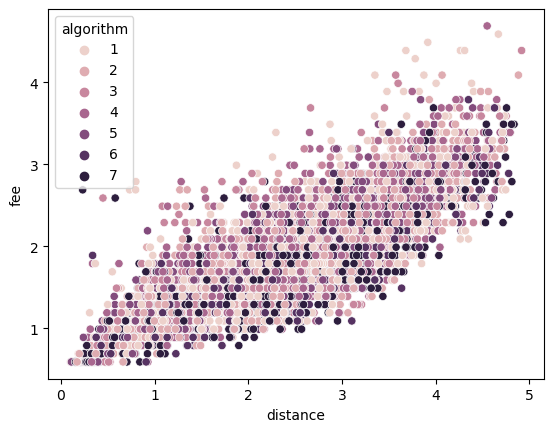

In [351]:
import seaborn as sns
sns.scatterplot(data=df, x='distance', y='fee', hue='algorithm')

<AxesSubplot: xlabel='distance', ylabel='fee'>

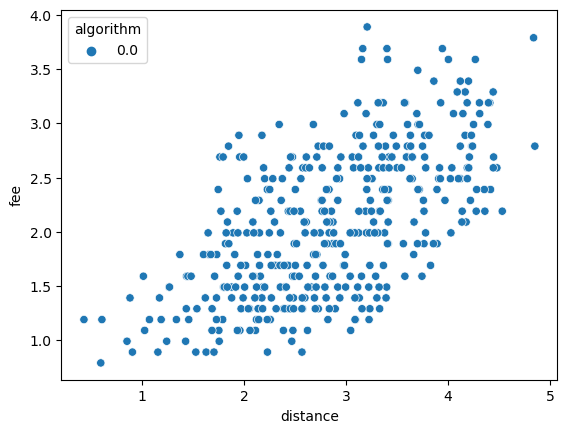

In [352]:
import seaborn as sns
sns.scatterplot(data=df_manual, x='distance', y='fee', hue='algorithm')